# 波士顿房价预测

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# 从sklearn.datasets导入波士顿房价数据，并读取房价数据存储在变量X,y中
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name="boston", version=1, as_frame=True, return_X_y=True, parser="pandas")

In [3]:
# 提取X的RM列（平均每居民房数）作为后续房价预测的自变量
# your code
data_rm = X['RM']
print(data_rm)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


In [11]:
# 计算并返回k的偏导数，使用了最小二乘法的偏导数公式
def partial_k(y_ture, y_guess, x):
    # INPUT ：y_true是真实的目标变量值，y_guess是预测的目标变量值，x是特征变量的值
    # OUTPUT：参数k的偏导数
    # your code
    n = len(y_ture)
    gradient = 0
    for i in range(n):
        gradient += (y_ture[i] - y_guess[i]) * x[i]
    return -2 / n * gradient

In [10]:
# 计算并返回b的偏导数，使用了最小二乘法的偏导数公式
def partial_b(y_ture, y_guess):
    # INPUT ：y_true是真实的目标变量值，y_guess是预测的目标变量值
    # OUTPUT：参数b的偏导数
    # your code
    n = len(y_ture)
    gradient = 0
    for i in range(n):
        gradient += (y_ture[i] - y_guess[i])
    return -2 / n * gradient

In [9]:
# 计算均方误差损失
def l2_loss(y_ture, y_guess):
    # INPUT ：y_true是真实的目标变量值，y_guess是预测的目标变量值
    # OUTPUT：均方误差损失
    # your code
    n = len(y_ture)
    loss = 0
    for i in range(n):
        loss += (y_ture[i] - y_guess[i]) ** 2
    return loss / n

In [5]:
# 根据参数k、x和b计算预测值y
def y_guess(k, x, b):
    # INPUT ：k是参数k，x是特征变量的值，b是参数b
    # OUTPUT：预测值y
    # your code
    return k * x + b


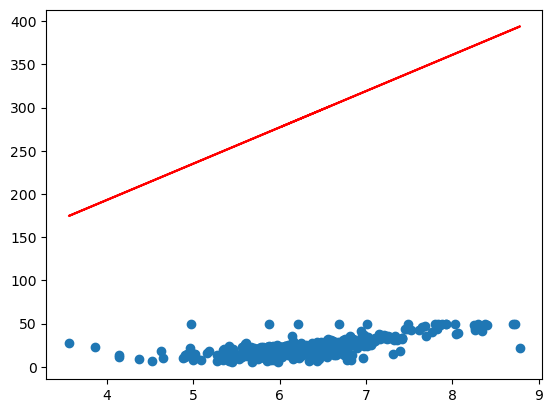

In [6]:
# 训练开始之前，对于参数k和b进行，随机处理。
k = random.randint(0, 50)
b = random.randint(-50, 50)

# 可视化原始数据和初始的预测线
# your code
plt.scatter(data_rm, y)
plt.plot(data_rm, y_guess(k, data_rm, b), color='red')
plt.show()

In [14]:
# 定义训练参数
trying_time = 10000  # 训练轮数
min_loss = float('inf')  # 损失值初始化为正无穷大，在训练过程中用于保存最小的损失值。
best_k, best_b = None, None  # 最优的参数值
learning_rate = 1e-4  # 不定，可通过自己尝试，找到最适合的学习率

In [15]:
# 模型训练 输出最小损失以及回归方程
# your code
for i in range(trying_time):
    y_hat = y_guess(k, data_rm, b)
    current_loss = l2_loss(y, y_hat)
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
    k_gradient = partial_k(y, y_hat, data_rm)
    b_gradient = partial_b(y, y_hat)
    k = k - learning_rate * k_gradient
    b = b - learning_rate * b_gradient
    if i % 5000 == 0:
        print('第{}轮训练，当前损失为：{:.2f}'.format(i, current_loss))
print('loss=', min_loss)
print('y = {} * x + {}'.format(best_k, best_b))

第0轮训练，当前损失为：75.25
第5000轮训练，当前损失为：74.50
loss= 73.76870146250897
y = 1.323137634052945 * x + 14.812333956556266


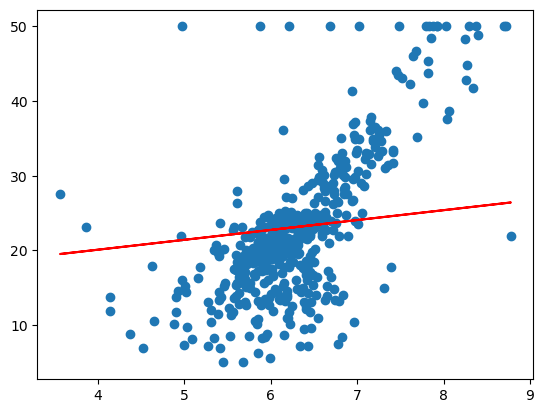

In [16]:
# 基于最佳参数，可视化结果
# your code
plt.scatter(data_rm, y)
plt.plot(data_rm, y_guess(best_k, data_rm, best_b), color='red')
plt.show()

# 流数据分析与可视化

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [10]:
# 读取数据，O_GWBH_500为出发格网id，D_GWBH_500为目的格网id，time为出发时间，num_total为这一时间里出发格网到目的格网的流量大小
s = pd.read_csv('./20170624.csv', sep='\s+')
grid = gpd.read_file('./grid/grid.shp') # grid为格网数据
gbd = gpd.read_file('./GBA/GBA.shp') 
s.head()

,O_GWBH_500,D_GWBH_500,time,num_total
0,5268,28574,7,1
1,5269,29399,21,1
2,5269,5269,20,1
3,5269,96877,14,1
4,5269,29399,3,1


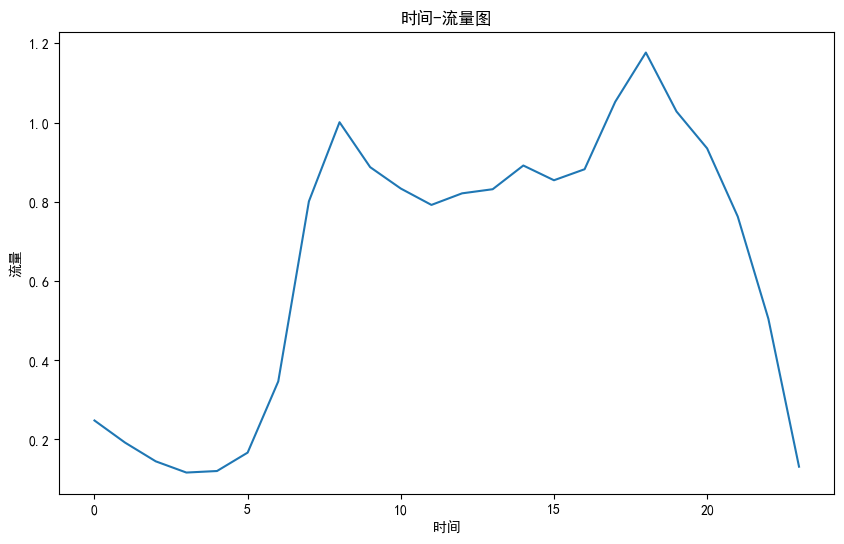

In [8]:
# 将数据以时间来聚合，并画出时间图，分析哪个时间段人流量多
# your code
plt.figure(figsize=(10, 6))
plt.plot(s.groupby('time').sum()['num_total'] / 1e6)
plt.xlabel('时间')
plt.ylabel('流量')
plt.title('时间-流量图')
plt.show()

In [11]:
grid['CSMC'].unique()

array(['江门市', '珠海市', '澳门', '香港', '中山市', '惠州市', '深圳市', '广州市', '佛山市', '东莞市',
       '肇庆市'], dtype=object)

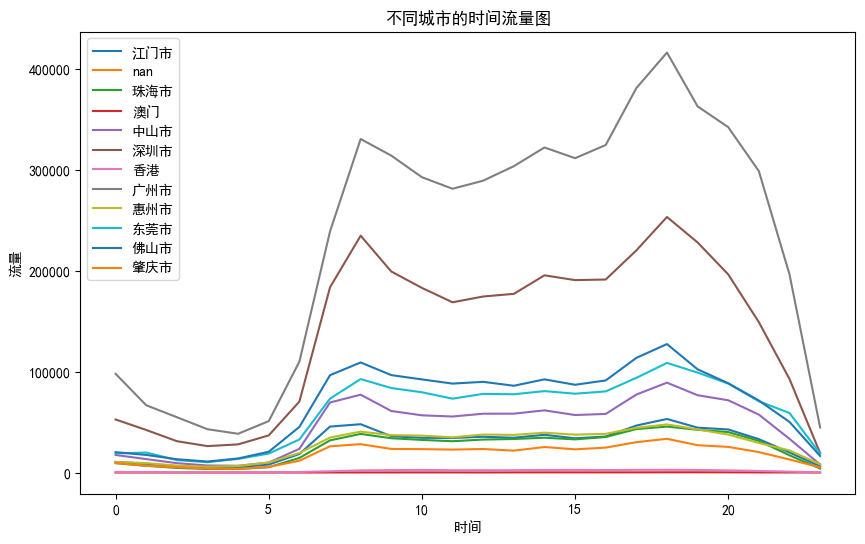

In [12]:
# 将数据与grid数据中的城市名称匹配，并画出不同城市的时间流量图
# your code
import warnings
warnings.filterwarnings('ignore')
s = pd.merge(s, grid[['GWBH_500', 'CSMC']], left_on='O_GWBH_500', right_on='GWBH_500', how='left') #意思是把s中的O_GWBH_500和grid中的GWBH_500进行匹配，匹配后的结果为s
plt.figure(figsize=(10, 6))
for city in s['CSMC'].unique():
    plt.plot(s[s['CSMC'] == city].groupby('time').sum()['num_total'], label=city)
plt.xlabel('时间')
plt.ylabel('流量')
plt.title('不同城市的时间流量图')
plt.legend()
plt.show()

Text(0.5, 1.0, '深圳出发格网的流量分布图')

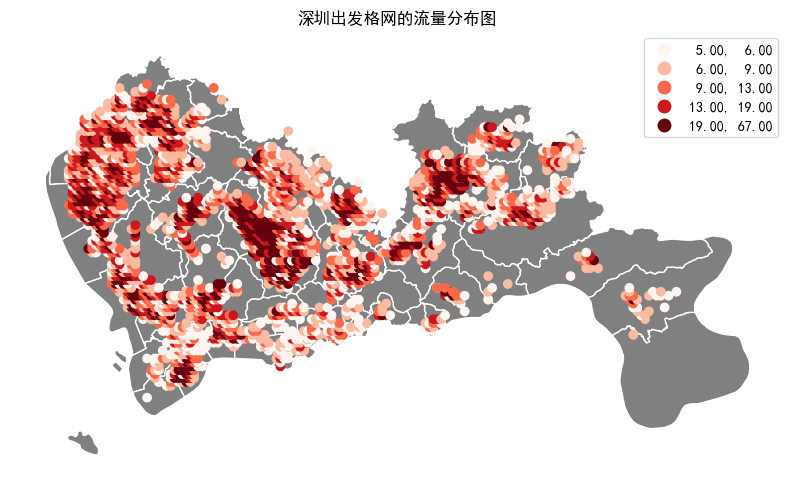

In [23]:
import matplotlib.patches as mpatches # 该库的作用为调整图例
import mapclassify as mc
# 画出深圳出发格网的流量分布图，底图为gba中的深圳图，图例制作可参考 https://zhuanlan.zhihu.com/p/554141746
# your code
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
sz = s[(s['CSMC'] == '深圳市') & (s['time'] == 12)]
sz = pd.merge(grid[grid['CSMC'] == '深圳市'][['GWBH_500', 'geometry']], sz, left_on='GWBH_500', right_on='O_GWBH_500') #出发格
from shapely.geometry import Point 
sz['centroid'] = sz['geometry'].centroid # 计算质心并替换坐标列
sz.drop(columns=['geometry', 'GWBH_500_x', 'GWBH_500_y'], inplace=True)
def get_point(row): # 点
    # return Point(row['centroid']) 
    return Point(row['centroid'].x, row['centroid'].y)

sz['point'] = sz.apply(get_point, axis=1) #每一行
sz = sz.set_geometry(sz['point'])
sz.drop(columns=['centroid', 'point'], inplace=True)
ax = gbd[gbd['CSMC'] == '深圳市'].plot(figsize=(10, 10), color='grey', edgecolor='white') #底图
ax = sz[sz['num_total'] >= 5].plot(ax=ax, column='num_total', cmap='Reds', scheme='quantiles', legend=True) # 绘制点的颜色为交通流量的总量，分为 5 个等级。
ax.axis('off') # 去坐标轴
ax.set_title('深圳出发格网的流量分布图')

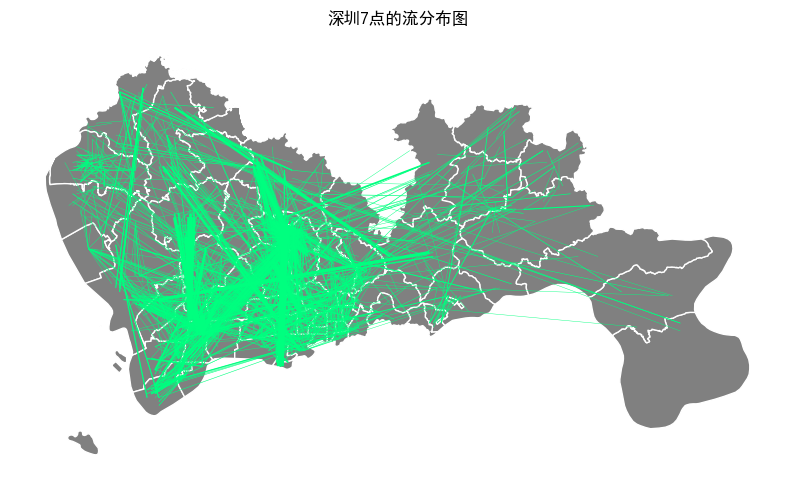

In [8]:
# 附加题，画出深圳7点的流分布图，最终示意图如下图
from shapely.geometry import LineString # 该库的作用为生成线
sz= s[(s['CSMC'] == '深圳市') & (s['time'] == 7)] 
sz= pd.merge(grid[grid['CSMC'] == '深圳市'][['GWBH_500', 'geometry']], sz, left_on='GWBH_500', right_on='O_GWBH_500') #始源
sz= pd.merge(grid[grid['CSMC'] == '深圳市'][['GWBH_500', 'geometry']], sz, left_on='GWBH_500', right_on='D_GWBH_500') #终焉
# 匹配深圳市 7 点的交通流量数据与深圳市 500 米网格的数据。

sz['O_centroid'], sz['D_centroid'] = sz['geometry_x'].centroid, sz['geometry_y'].centroid # 计算质心并替换坐标列
sz.drop(columns=['geometry_x', 'geometry_y', 'GWBH_500_x', 'GWBH_500_y'], inplace=True)
def get_line(row): # 线
    return LineString([row['O_centroid'], row['D_centroid']])


sz['line'] = sz.apply(get_line, axis=1) #每一行
sz = sz.set_geometry(sz['line']) #set_geometry() 函数可以将 line 列设置为 sz 数据框的几何图形列。
sz.drop(columns=['O_centroid', 'D_centroid', 'line'], inplace=True) 
ax = gbd[gbd['CSMC'] == '深圳市'].plot(figsize=(10, 10), color='grey', edgecolor='white') #底图
ax = sz[sz['num_total'] >= 3].plot(ax=ax, color='springgreen', linewidth=sz[sz['num_total'] >= 3]['num_total'] / 10) # 绘制线的宽度为交通流量的总量除以 10。
ax.axis('off') # 去坐标轴
ax.set_title('深圳7点的流分布图')
plt.show()